In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Data/data.csv")
print("shape:", df.shape)
df.head()

shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.iloc[:, 1:].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
# checking datatypes of features
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
# check for missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# The last feature "Unnamed: 32" has all NaN values. 
# So the last feature and id's removed from the datafame.

df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualization

Let's plot the count plot of the diagnosis feature to analyze the balance of the dataset. It contains some imbalance, although not very high in the data. The imbalance of classes is not at a level that will cause us to manipulate the data. If this imbalance was 10% or less, we could solve this problem using sampling methods.

Number of Malignant :  212
Number of Benign:  357


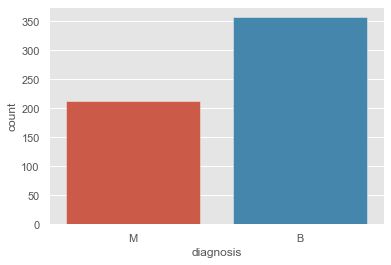

In [7]:
ax = sns.countplot(df['diagnosis'], label="Count")
B, M = df['diagnosis'].value_counts()

print('Number of Malignant : ', M)
print('Number of Benign: ', B)

### Pairplot
Using sns pairplot (like pandas' scatter matrix), we can examine the relationships of different values of different features on predicting whether the cancer is malignant or benign.

_**Radius**_, _**perimeter**_ and _**area**_ characteristics are observed closely related in each other. Mathematically it can be said that this makes sense. We can also say that benign tumors have smaller cell size.

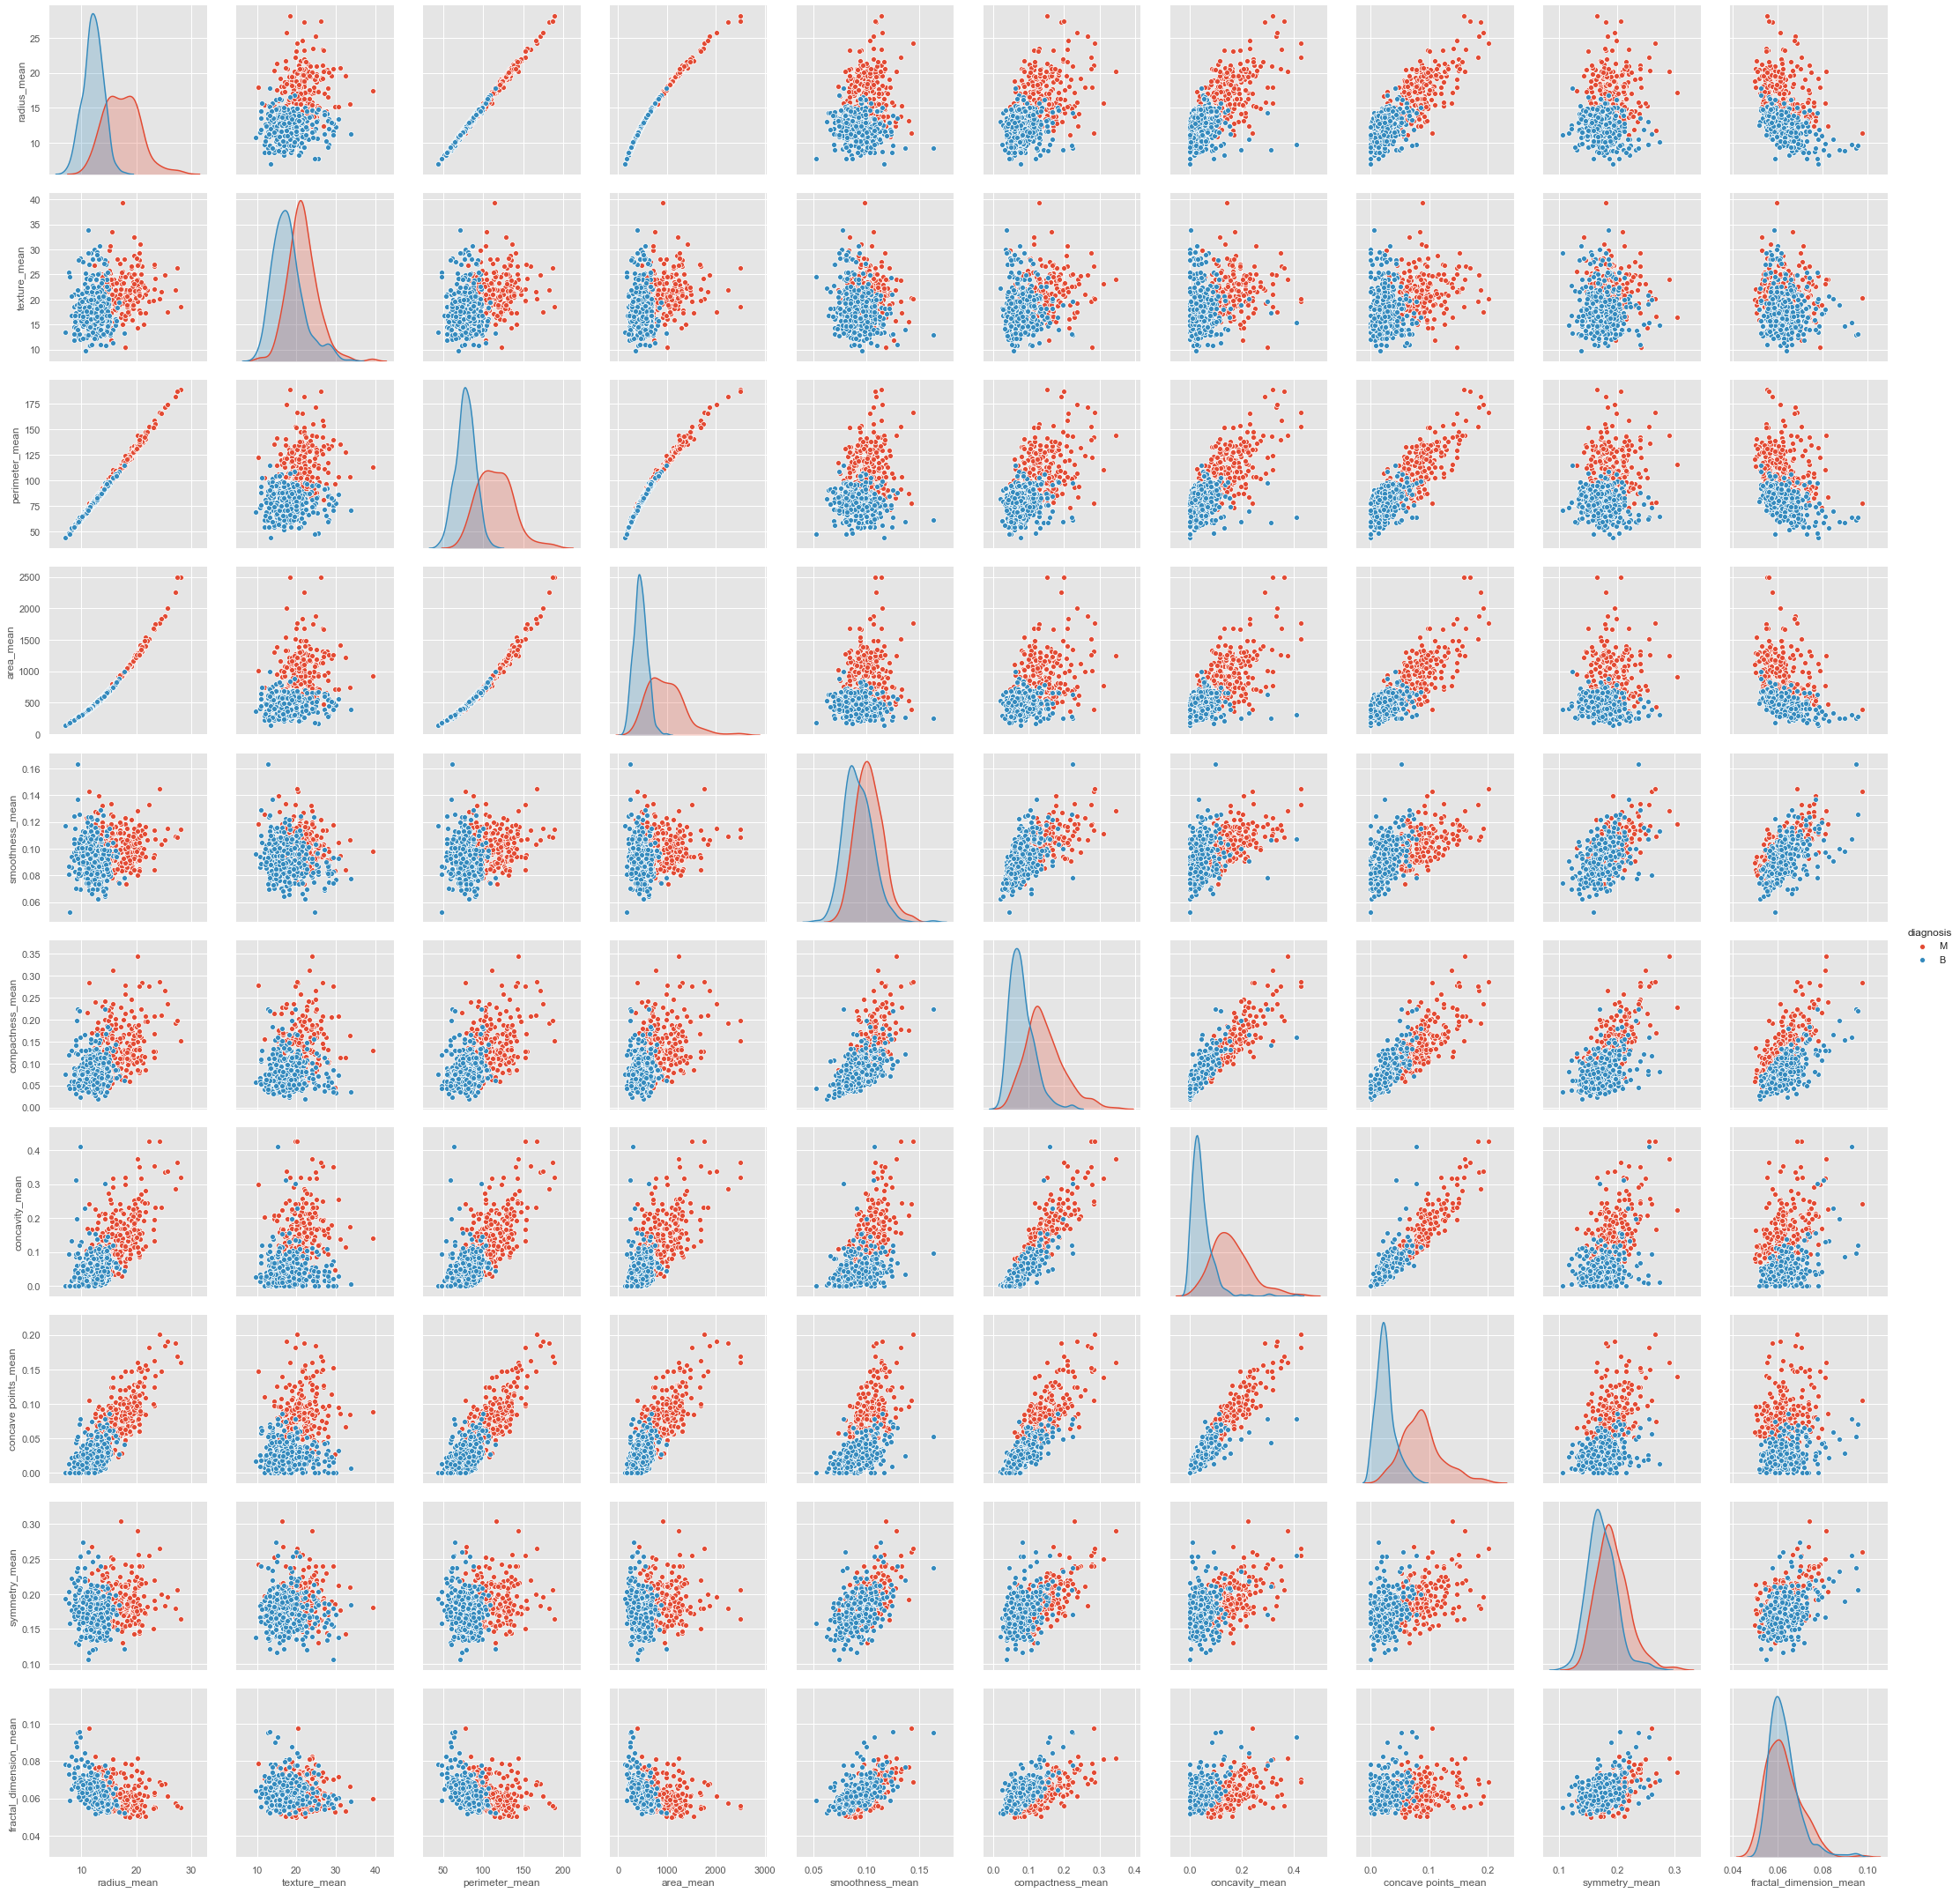

In [8]:
sns.pairplot(df.loc[:, list(df.columns[1:11]) + ['diagnosis']], hue = "diagnosis", height = 3)
plt.show()

Using simple map function, 
we will change the categorical variable "diagnosis" which is 'M' or 'B' to numerically.

**M -> 1<br>
B -> 0**

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Heatmap

We can analyze the correlation between features using the heatmap function from the seaborn python package. The heatmap function takes the following arguments:

**data** – 2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

**annot** – an array of same shape as data which is used to annotate the heatmap.

**cmap** – a matplotlib colormap name or object. This maps the data values to the color space.

**fmt** – string formatting code to use when adding annotations.

**linewidths** – sets the width of the lines that will divide each cell.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


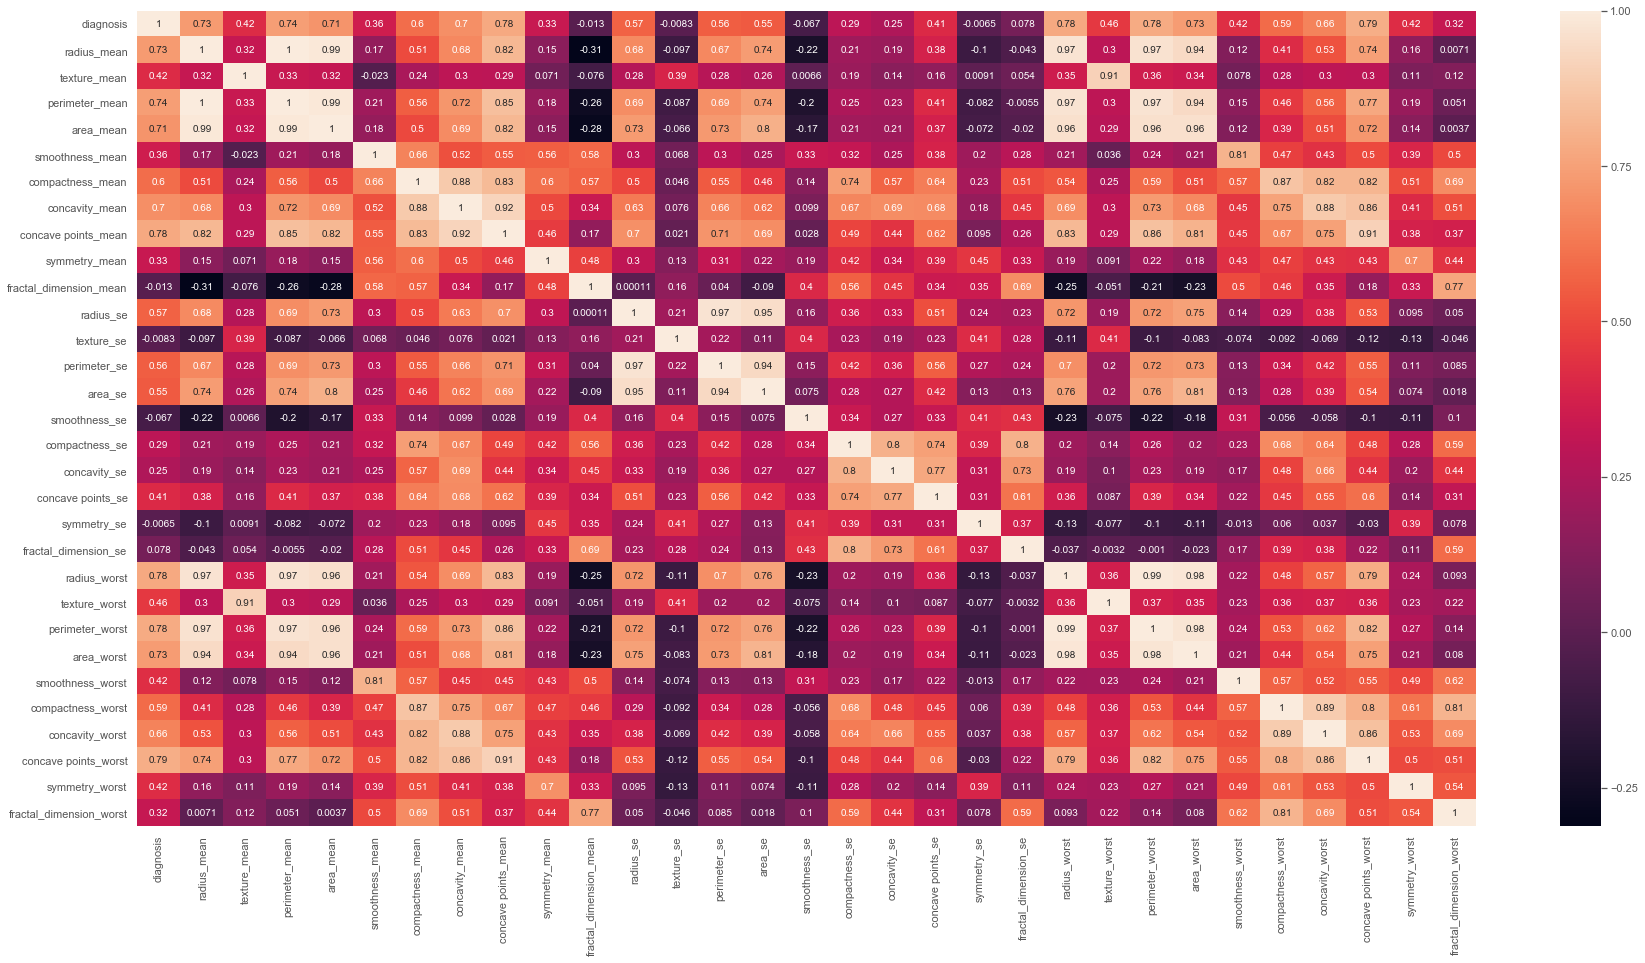

In [53]:
plt.figure(figsize=(30,15))
corr = df.corr()
sns.heatmap(corr, annot=True)
corr

For example, we will use a classifier model later on when selecting features. However, from the correlation matrix we obtained here, we manually found all the features that have a correlation of more than **0.7** from the effects the diagnosis of the disease. We will use these features for comparison later.

In [95]:
manually_selected = corr.columns[corr['diagnosis'] > 0.7][1:]
manually_selected

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

Using scatterplot, we can draw the correlation between the two variables.
Let's draw the plot for these two features. The plot's similarity to the line y = x as below shows that there is a **positive correlation** between the two properties.

corr(concavity_mean, compactness_mean) ~ 0.88


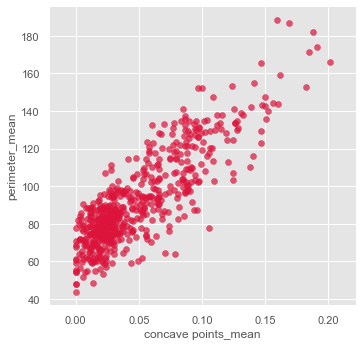

In [11]:
fig, ax = plt.subplots(figsize=(5.5,5.5))
ax.scatter(df['concave points_mean'], df['perimeter_mean'], color = 'crimson', alpha = 0.7)
ax.set_xlabel('concave points_mean')
ax.set_ylabel('perimeter_mean')
plt.show()

We can do a similar thing to what we did above using Seaborn’s "jointplot" displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This function combines the histogram and the kind of model.

Drawing a plot of two variables with kind: **regression**.

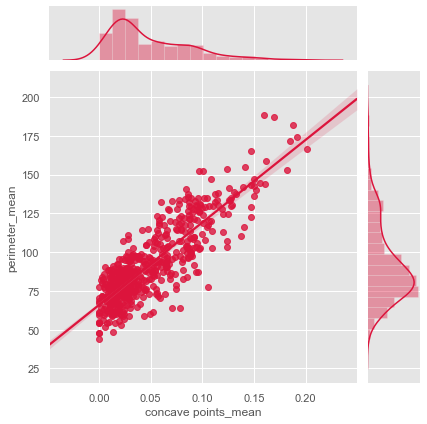

In [12]:
sns.jointplot(df.loc[:,'concave points_mean'], df.loc[:,'perimeter_mean'], 
              kind="reg", color="crimson")

### Split the datasets
Split the datasets into training and test set with the **same proportion** and **samples**.

In [13]:
X = df.iloc[:, 1:]
y = df[['diagnosis']]

# Original Dataset (OD)
OD_X_train, OD_X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Original dataset -> train:", len(OD_X_train), "test:",len(OD_X_test))

Original dataset -> train: 455 test: 114


### Normalize and split the dataset using min-max standardization

The interpretation and analysis of non-normalized features is quite difficult during the data analysis phase. To avoid this inconsistency, we can normalize using the MinMax method.

In [14]:
# splitting the dataset
from sklearn import preprocessing

# create the normalized dataset (ND)
min_max_scaler = preprocessing.MinMaxScaler()

ND = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns, index=X.index)
ND_X_train = pd.DataFrame(min_max_scaler.fit_transform(OD_X_train), 
                          columns=OD_X_train.columns, index=OD_X_train.index)
ND_X_test = pd.DataFrame(min_max_scaler.transform(OD_X_test), 
                         columns=OD_X_test.columns, index=OD_X_test.index)

print("Normalized dataset -> train:", len(ND_X_train), "test:",len(ND_X_test))
ND.head()

Normalized dataset -> train: 455 test: 114


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


For example, the maximum value of area_mean is **1500**, while the maximum value of perimeter_mean is around **200**. As can be seen in the results, the analysis of the normalized features has become quite understandable.

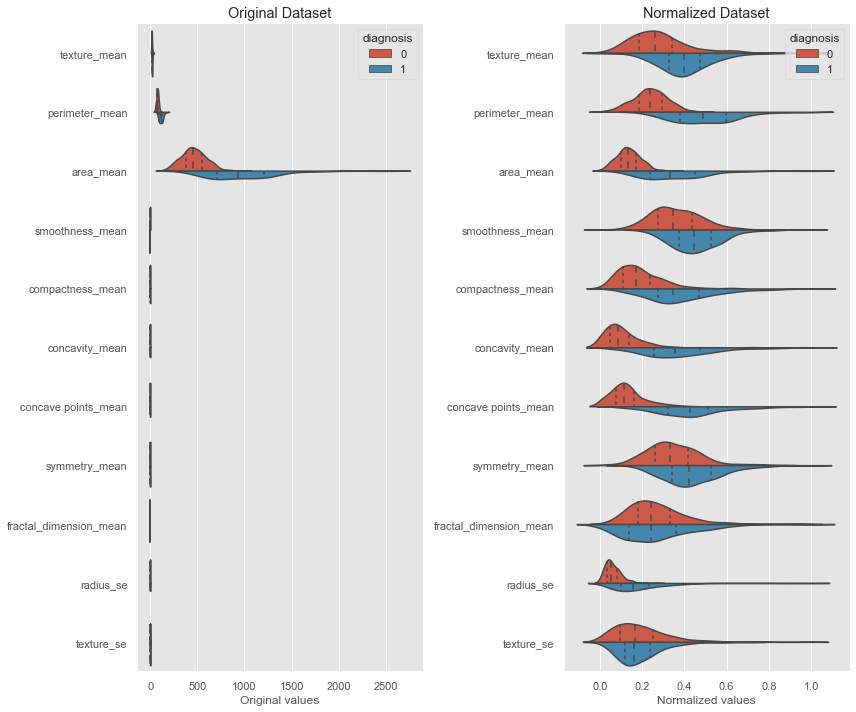

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))

OD_data = pd.concat([y, X.iloc[:,1:12]], axis=1)
ND_data = pd.concat([y, ND.iloc[:,1:12]], axis=1)

OD_data = pd.melt(OD_data, id_vars="diagnosis", var_name="", value_name='Original values')
ND_data = pd.melt(ND_data,id_vars="diagnosis", var_name="", value_name='Normalized values')

axes[0].set_title('Original Dataset')
sns.violinplot(x = "Original values", y = "", hue = "diagnosis", 
               data=OD_data, split=True, inner="quartile", orient='h', ax=axes[0])

axes[1].set_title('Normalized Dataset')
sns.violinplot(x = "Normalized values", y = "", hue = "diagnosis", 
               data=ND_data, split=True, inner="quartile", orient='h', ax=axes[1])

fig.tight_layout()

Let's observe the two features comparatively from the data set we scaled with Min-Max scaling. We observe that the values are scaled between 0 and 1.

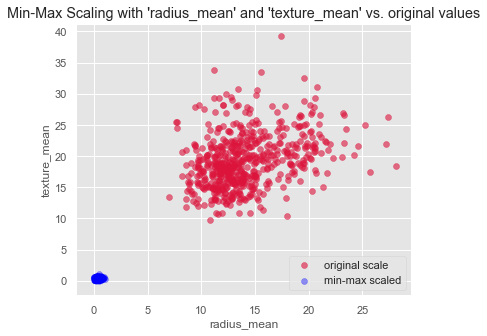

In [83]:
plt.figure(figsize=(6,5))

plt.scatter(df['radius_mean'], df['texture_mean'], color='crimson', label='original scale', alpha=0.6)
plt.scatter(ND['radius_mean'], ND['texture_mean'], color='blue', label='min-max scaled', alpha=0.4)

plt.title("Min-Max Scaling with 'radius_mean' and 'texture_mean' vs. original values")
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend(loc='lower right')
plt.show()

# Clustering


We will use the **elbow curve method** to decide the number of clusters. As we have seen, the number of 2 clusters represents the data in the best way. Let's fit our model for 2 clusters.

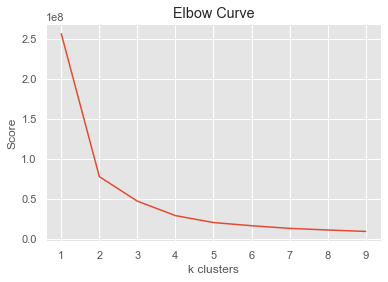

In [17]:
from sklearn.cluster import KMeans
clusters = list()
k_scores = list()

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10)
    score = 1 - kmeans.fit(X).score(X)
    clusters.append(kmeans)
    k_scores.append(score)

plt.plot(range(1, 10), k_scores)
plt.xlabel('k clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

###  Clustering the OD dataset

In [18]:
od_kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42).fit(X)

If we examine the area_mean property, the clustering of non-normalized data contains very distant points. We also see that the model classifies the points with area_mean value below 1000 as cluster 0.

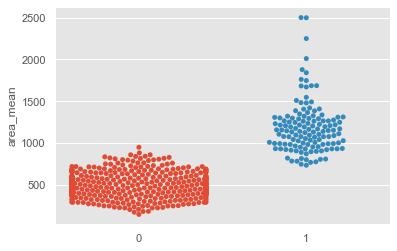

In [102]:
sns.swarmplot(od_kmeans.labels_, X.area_mean)

According to the texture_mean and radius_mean properties, the clustering of the data seems to be successful. But we see that it clustered some points incorrectly. Approximately **85 percent success rate** was achieved.

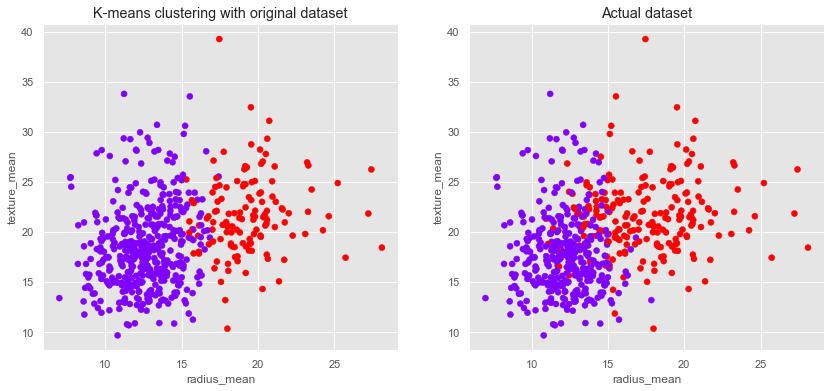

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=od_kmeans.labels_, cmap='rainbow')
axes[0].set_title('K-means clustering with original dataset')
axes[0].set_xlabel('radius_mean')
axes[0].set_ylabel('texture_mean')

axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.diagnosis.values, cmap='rainbow')
axes[1].set_title('Actual dataset')
axes[1].set_xlabel('radius_mean')
axes[1].set_ylabel('texture_mean')

plt.show()

###  Clustering the ND dataset

In [25]:
nd_kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42).fit(ND)

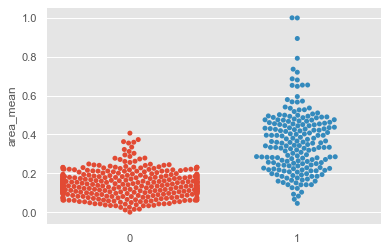

In [26]:
sns.swarmplot(nd_kmeans.labels_, ND.area_mean)

After normalizing our data set, we performed clustering, again. Results closer to the original data were obtained. Approximately **92 percent success rate** was achieved. We can say that normalization has a positive effect on clustering.

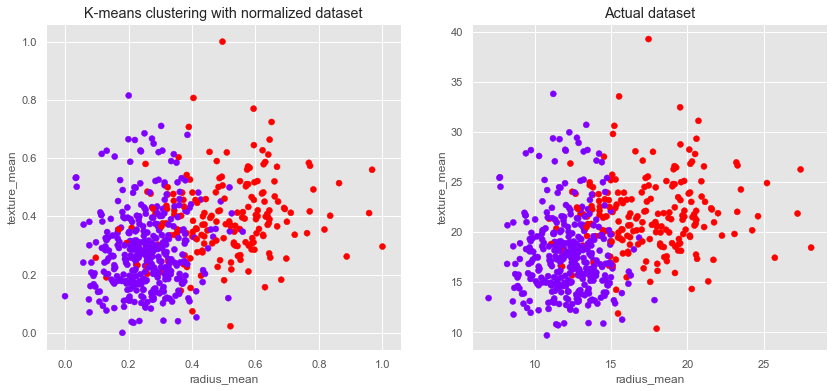

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].scatter(ND.iloc[:, 0], ND.iloc[:, 1], c=nd_kmeans.labels_, cmap='rainbow')
axes[0].set_title('K-means clustering with normalized dataset')
axes[0].set_xlabel('radius_mean')
axes[0].set_ylabel('texture_mean')

axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.diagnosis.values, cmap='rainbow')
axes[1].set_title('Actual dataset')
axes[1].set_xlabel('radius_mean')
axes[1].set_ylabel('texture_mean')

plt.show()

# Classification

### Feature engineering


When choosing a feature, we would like to choose the most distinctive features. Based on the swarmplot below, we see that the **radius_worst** and **area_worst** properties can classify the data well according to the diagnosis.

For example, as you can see in the swarm plot below, **"radius_worst"** and **"perimeter_worst"** properties look very similar. We can also see this on the heatmap which is the correlation value almost 99%. Accordingly, it will be sufficient for us to use one of these two features.

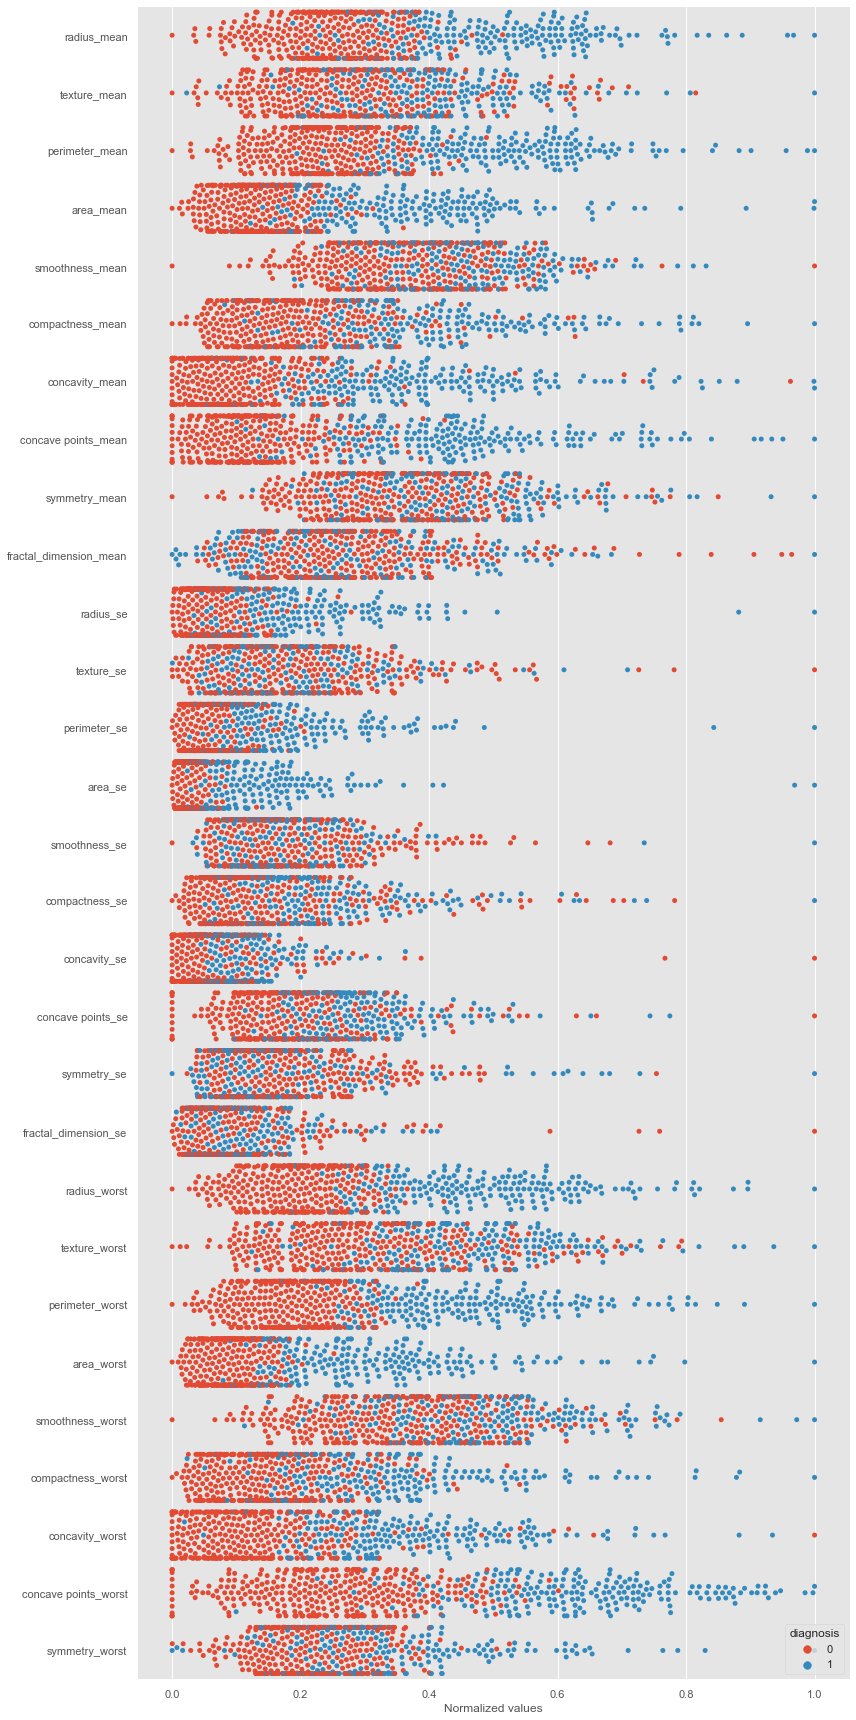

In [36]:
plt.figure(figsize=(12,24))
ND_data = pd.concat([y, ND.iloc[:,:-1]], axis=1)

ND_data = pd.melt(ND_data,id_vars="diagnosis", var_name="", value_name='Normalized values')
sns.swarmplot(x = "Normalized values", y = "", hue = "diagnosis", data=ND_data)
plt.tight_layout()

We can use classifiers which trees in this case to evaluate the importance of features. After fitting our model, we get the rank values of the features. We can analyze that begins with like **"\_worst"** features are significantly effective in the classification process. For example, the importance value of the **"concave points_worst"** property is approximately 0.12.

This class implements a estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

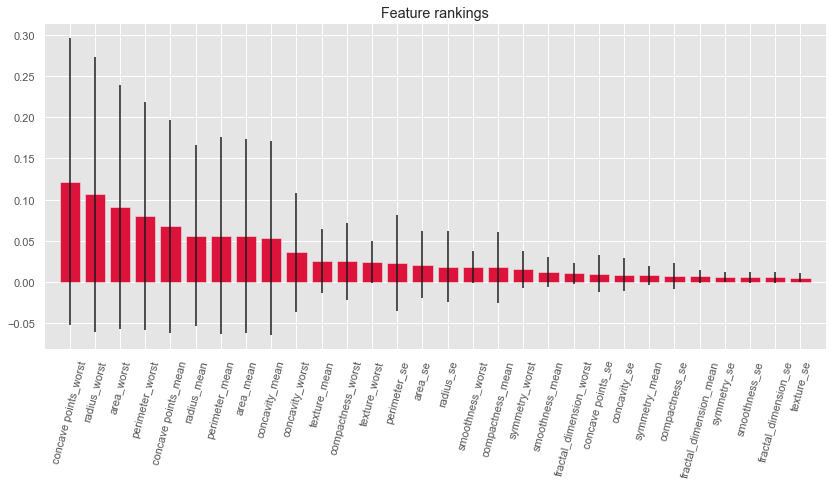

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(n_estimators=200, random_state=0)
etc_model.fit(X, y)

# After getting the rankings of the features, we sort the index numbers.
importances = etc_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in etc_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plotting the Feature Rankings
plt.figure(1, figsize=(14, 6))
plt.title("Feature rankings")
plt.bar(range(X.shape[1]), importances[indices], color="crimson", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=75)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature selection tries to eliminate candidate features that are irrelevant, thereby decreasing the complexity of the model. The code below will automatically select features using the **RandomForest** classifier and the module named **SelectFromModel**. We can assign to the SelectFromModel how many features to select and the threshold importance value of the features. The first 5 classes in the output were selected.

In [100]:
# using RandomForestClassifier to select features based on feature importance.
clf = RandomForestClassifier(n_estimators=200, random_state=0)

RF_selector = SelectFromModel(clf, max_features=9)
RF_selector.fit_transform(X, y)
RF_selector_support = RF_selector.get_support()

# isolate the df with selected features then return them as a list
selected_features = X.loc[:,RF_selector_support].columns.tolist()

print("", len(selected_features), "Selected features:\n", selected_features,
     "\n\n", len(selected_features), "Manually selected features:\n", manually_selected)


 9 Selected features:
 ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'] 

 9 Manually selected features:
 Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


# Support Vector Machine Classifier

### Original Dataset Classification (Full featured vs. Limited featured)

Let's try to classify the data we previously split with the SVM classifier. First of all, a model with **all the features** was created. Then, a model containing the **first 9 features** that have the highest importance in the feature selection section above was created.

In [103]:
print("Support Vector Machine Classifier /")
od_clf = SVC(kernel='linear')
od_clf.fit(X=OD_X_train,y=y_train)
y_pred = od_clf.predict(OD_X_test)
tr_SVC_full_acc = od_clf.score(OD_X_train, y_train)
SVC_full_acc = accuracy_score(y_test, y_pred)

print(' >Full Feature Original Dataset:')
print('\tTraining Accuracy:', tr_SVC_full_acc)
print('\tTest Accuracy: ', SVC_full_acc)

# Feature Selection
OD_X_selected_train = RF_selector.transform(OD_X_train)
OD_X_selected_test = RF_selector.transform(OD_X_test)

od_clf_selected = SVC(kernel='linear')
od_clf_selected.fit(X=OD_X_selected_train, y=y_train)
y_pred = od_clf_selected.predict(OD_X_selected_test)
tr_SVC_limited_acc = od_clf_selected.score(OD_X_selected_train, y_train)
SVC_limited_acc = accuracy_score(y_test, y_pred)

print(' >Limited Feature Original Dataset:')
print('\tTraining Accuracy:', tr_SVC_limited_acc)
print('\tTest Accuracy: ', SVC_limited_acc)

Support Vector Machine Classifier /
 >Full Feature Original Dataset:
	Training Accuracy: 0.9648351648351648
	Test Accuracy:  0.956140350877193
 >Limited Feature Original Dataset:
	Training Accuracy: 0.9494505494505494
	Test Accuracy:  0.9122807017543859


We observe that feature selection has a negative effect on the success of our model. Due to the low number of data, **reducing the complexity** of the model in this way decreased the success rate. Below you can examine the confusion matrix, which includes the prediction by classes.

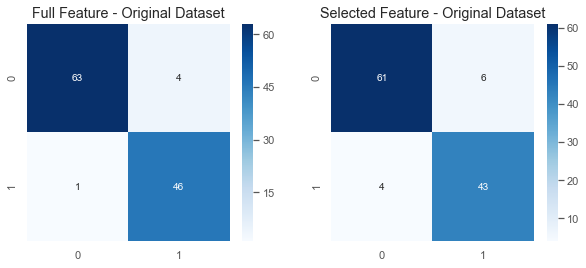

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].set_title('Full Feature - Original Dataset')
c_matrix = confusion_matrix(y_test, od_clf.predict(OD_X_test))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])

axes[1].set_title('Selected Feature - Original Dataset')
c_matrix = confusion_matrix(y_test, od_clf_selected.predict(OD_X_selected_test))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[1])

### Normalized Dataset Classification (Full featured vs. Limited featured)

When we run the classification model on the data set that we normalize, we see that we have achieved a more successful result than the original data set. Normalizing the value differences between the features increases the success rate positively. We have already said that the normalization will have a positive effect in the clustering section within the data analysis section above.

In [105]:
print("Support Vector Machine Classifier /")

nd_clf = SVC(kernel='linear')
nd_clf.fit(X=ND_X_train,y=y_train)
y_pred = nd_clf.predict(ND_X_test)
tr_ND_SVC_full_acc =nd_clf.score(ND_X_train, y_train)
ND_SVC_full_acc = accuracy_score(y_test, y_pred)

print(' >Full Feature Normalized Dataset:')
print('\tTraining Accuracy:', tr_ND_SVC_full_acc)
print('\tTest Accuracy: ', ND_SVC_full_acc)

# Feature Selection
ND_X_selected_train = RF_selector.transform(ND_X_train)
ND_X_selected_test = RF_selector.transform(ND_X_test)

nd_clf_selected = SVC(kernel='linear')
nd_clf_selected.fit(X=ND_X_selected_train, y=y_train)
y_pred = nd_clf_selected.predict(ND_X_selected_test)
tr_ND_SVC_limited_acc = nd_clf_selected.score(ND_X_selected_train, y_train)
ND_SVC_limited_acc = accuracy_score(y_test, y_pred)

print(' >Limited Feature Normalized Dataset:')
print('\tTraining Accuracy:', tr_ND_SVC_limited_acc)
print('\tTest Accuracy: ', ND_SVC_limited_acc)

Support Vector Machine Classifier /
 >Full Feature Normalized Dataset:
	Training Accuracy: 0.9824175824175824
	Test Accuracy:  0.9649122807017544
 >Limited Feature Normalized Dataset:
	Training Accuracy: 0.9384615384615385
	Test Accuracy:  0.956140350877193


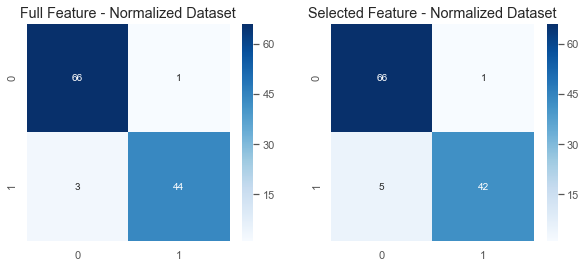

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].set_title('Full Feature - Normalized Dataset')
c_matrix = confusion_matrix(y_test, nd_clf.predict(ND_X_test))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])

axes[1].set_title('Selected Feature - Normalized Dataset')
c_matrix = confusion_matrix(y_test, nd_clf_selected.predict(ND_X_selected_test))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[1])

The feature selection reduces the complexity of the model, but it does not guarantee increased accuracy. In this case, automatic feature selection reduced the complexity of the model, but reduced the success rate. This eventually provides a faster model training time.

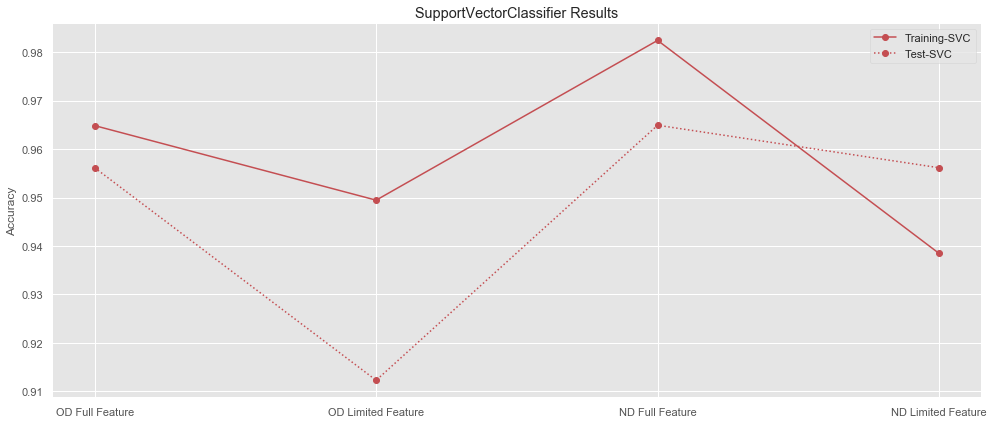

In [106]:
plt.figure(1, figsize=(14, 6))
x_axis = ['OD Full Feature', 'OD Limited Feature','ND Full Feature', 'ND Limited Feature']

plt.title('SupportVectorClassifier Results')
plt.plot(x_axis,[tr_SVC_full_acc, tr_SVC_limited_acc, tr_ND_SVC_full_acc, tr_ND_SVC_limited_acc], 
         label='Training-SVC', marker='o', color='r')
plt.plot(x_axis,[SVC_full_acc, SVC_limited_acc, ND_SVC_full_acc, ND_SVC_limited_acc], 
         label='Test-SVC', marker='o', linestyle=':', color='r')
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()

# Random Forest Classifier

Let's do the same procedure using RandomForest which is another classification method.

### Original Dataset Classification (Full featured vs. Limited featured)

Unlike SVC, our selection of features in this model increased the success rate we had. This may be due to the low success rate in linear models due to the low data available.

In [107]:
print("Random Forest Classifier /")
od_clf = RandomForestClassifier(random_state=42)
od_clf.fit(OD_X_train, y_train)
y_pred = od_clf.predict(OD_X_test)
tr_OD_RF_full_acc = od_clf.score(OD_X_train, y_train)
OD_RF_full_acc = accuracy_score(y_test, y_pred)

print(' >Full Feature Original Dataset:')
print('\tTraining Accuracy:', tr_OD_RF_full_acc)
print('\tTest Accuracy: ', OD_RF_full_acc)

# Feature Selection
OD_X_selected_train = RF_selector.transform(OD_X_train)
OD_X_selected_test = RF_selector.transform(OD_X_test)

od_clf_selected = RandomForestClassifier(random_state=42)
od_clf_selected.fit(OD_X_selected_train, y_train)
y_pred = od_clf_selected.predict(OD_X_selected_test)
tr_OD_RF_limited_acc = od_clf_selected.score(OD_X_selected_train, y_train)
OD_RF_limited_acc = accuracy_score(y_test, y_pred)

print(' >Limited Feature Original Dataset:')
print('\tTraining Accuracy:', tr_OD_RF_limited_acc)
print('\tTest Accuracy: ', OD_RF_limited_acc)

Random Forest Classifier /
 >Full Feature Original Dataset:
	Training Accuracy: 0.9956043956043956
	Test Accuracy:  0.9473684210526315
 >Limited Feature Original Dataset:
	Training Accuracy: 0.9956043956043956
	Test Accuracy:  0.9649122807017544


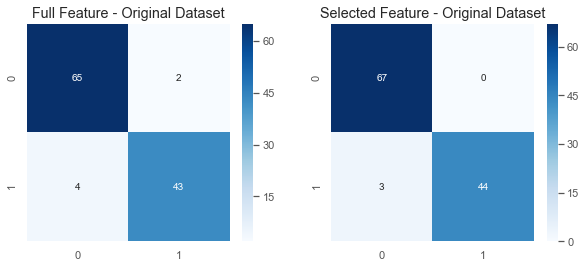

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].set_title('Full Feature - Original Dataset')
c_matrix = confusion_matrix(y_test, od_clf.predict(OD_X_test))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])

axes[1].set_title('Selected Feature - Original Dataset')
c_matrix = confusion_matrix(y_test, od_clf_selected.predict(OD_X_selected_test))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[1])

### Normalized Dataset Classification (Full featured vs. Limited featured)

In [108]:
print("Random Forest Classifier /")

nd_clf = RandomForestClassifier(random_state=42)
nd_clf.fit(ND_X_train, y_train)
y_pred = nd_clf.predict(ND_X_test)
tr_ND_RF_full_acc = nd_clf.score(ND_X_train, y_train)
ND_RF_full_acc = accuracy_score(y_test, y_pred)

print(' >Full Feature Normalized Dataset:')
print('\tTraining Accuracy:', tr_ND_RF_full_acc)
print('\tTest Accuracy: ', ND_RF_full_acc)

# Feature Selection
ND_X_selected_train = RF_selector.transform(ND_X_train)
ND_X_selected_test = RF_selector.transform(ND_X_test)

nd_clf_selected = RandomForestClassifier(random_state=42)
nd_clf_selected.fit(ND_X_selected_train, y_train)
y_pred = nd_clf_selected.predict(ND_X_selected_test)
tr_ND_RF_limited_acc = nd_clf_selected.score(ND_X_selected_train, y_train)
ND_RF_limited_acc = accuracy_score(y_test, y_pred)

print(' >Limited Feature Normalized Dataset:')
print('\tTraining Accuracy:', tr_ND_RF_limited_acc)
print('\tTest Accuracy: ', ND_RF_limited_acc)

Random Forest Classifier /
 >Full Feature Normalized Dataset:
	Training Accuracy: 0.9956043956043956
	Test Accuracy:  0.9473684210526315
 >Limited Feature Normalized Dataset:
	Training Accuracy: 0.9956043956043956
	Test Accuracy:  0.9649122807017544


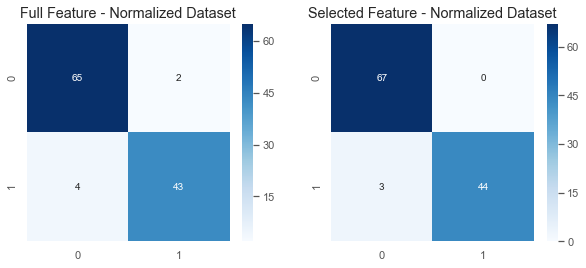

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].set_title('Full Feature - Normalized Dataset')
c_matrix = confusion_matrix(y_test, nd_clf.predict(ND_X_test))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])

axes[1].set_title('Selected Feature - Normalized Dataset')
c_matrix = confusion_matrix(y_test, nd_clf_selected.predict(ND_X_selected_test))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[1])

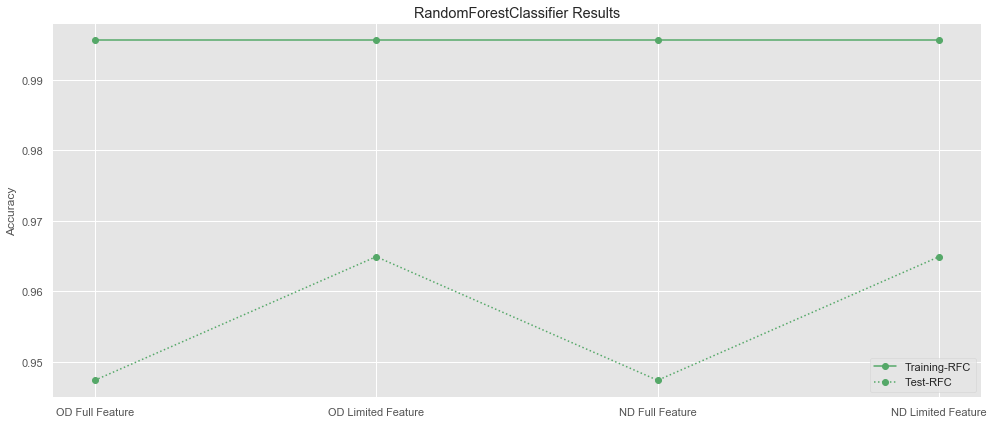

In [109]:
plt.figure(1, figsize=(14, 6))

plt.title('RandomForestClassifier Results')
plt.plot(x_axis, [tr_OD_RF_full_acc, tr_OD_RF_limited_acc, tr_ND_RF_full_acc, tr_ND_RF_limited_acc], 
         label='Training-RFC', marker='o', color='g')
plt.plot(x_axis, [OD_RF_full_acc, OD_RF_limited_acc, ND_RF_full_acc, ND_RF_limited_acc], 
         label='Test-RFC', linestyle=':', marker='o', color='g')
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()